In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import platform
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


total22_df = pd.read_csv("전연령22_utf8.csv", low_memory=False)
senior22_df = pd.read_csv("노인승하차22_utf8.csv", low_memory=False)
total24_df = pd.read_csv("전연령24_utf8.csv", low_memory=False)
senior24_df = pd.read_csv("노인승하차24_utf8.csv", low_memory=False)
#senior_care_df = pd.read_csv("senior_care_utf8.csv", low_memory=False) # 파일이 사라짐
sme_df = pd.read_csv("sme.csv", low_memory=False)
park_df = pd.read_csv("TB_PTP_PRK_M.csv", low_memory=False)
safety_df = pd.read_csv("안전사고_utf.csv", low_memory=False)


# 역별 승하차인원           => total22_df, total24_df
# 65세 노인 승하차인원      => senior22_df, senior24_df
# 노인요양시설(요양원)      => senior_care_df
# 종사자, 사업체 수         => sme_df
# 안전사고                  => safety_df

# ------------------
# 확인용
# print(total22_df.head())
# print(total22_df.columns)
# print(senior22_df.head())
# print(senior22_df.columns)
# print(safety_df.head())
# print(senior_care_df.head())
# print(senior_care_df.columns)
# print(sme_df.head())
# print(sme_df.columns)
# print(park_df.head())
# ------------------

In [32]:

# 역번호가 호선이 아닌 코드로 되어 있어 호선으로 변환해주는 함수를 생성
def get_line_senior(station_id):
    sid = str(station_id)
    if sid.startswith('1'): return '1호선'
    if sid.startswith('2') and len(sid) == 3: return '2호선'
    if sid.startswith('3'): return '3호선'
    if sid.startswith('4'): return '4호선'
    if sid.startswith('25'): return '5호선'
    if sid.startswith('26'): return '6호선'
    if sid.startswith('27'): return '7호선'
    if sid.startswith('28'): return '8호선'
    return '기타'

# C. 호선 통일 (가공 전의 첫 번째 단계)
senior22_df['호선'] = senior22_df['역번호'].apply(get_line_senior)
senior24_df['호선'] = senior24_df['역번호'].apply(get_line_senior) 
total22_df['호선'] = total22_df['호선'].astype(str) + '호선'
total24_df['호선'] = total24_df['호선'].astype(str) + '호선'

# D. 시간대 컬럼 정의 (수정된 최종 버전)
time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# E. 범용 처리 함수 정의 (이전 코드와 동일)
def process_df(df, year, time_cols):
    # ... (함수 내용 동일) ...
    for col in time_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    df['일일총승객수'] = df[time_cols].sum(axis=1)
    df['연도'] = year
    return df # 호선 최종 점검 코드는 이미 위에서 처리했으므로 생략 가능

# F. 모든 DataFrame에 처리 함수 적용 및 통합
senior22_df = process_df(senior22_df, 2022, time_cols)
senior24_df = process_df(senior24_df, 2024, time_cols)
total22_df = process_df(total22_df, 2022, time_cols)
total24_df = process_df(total24_df, 2024, time_cols)
senior_combined_df = pd.concat([senior22_df, senior24_df], ignore_index=True)

print("✅ 모든 데이터 정제 및 특징 추출(일일총승객수, 연도) 완료.")
print("=====================================================")
print("✅ 1. senior22_df (노인층 2022년) 데이터 미리보기")
print(senior22_df.head())
print(f"크기: {senior22_df.shape}\n")
print("-" * 50)

print("✅ 2. senior24_df (노인층 2024년) 데이터 미리보기")
print(senior24_df.head())
print(f"크기: {senior24_df.shape}\n")
print("-" * 50)

print("✅ 3. total22_df (전연령 2022년) 데이터 미리보기")
print(total22_df.head())
print(f"크기: {total22_df.shape}\n")
print("-" * 50)

print("✅ 4. total24_df (전연령 2024년) 데이터 미리보기")
print(total24_df.head())
print(f"크기: {total24_df.shape}\n")
print("-" * 50)

# 2. 통합 DataFrame 출력
print("=====================================================")
print("✅ 5. senior_combined_df (노인층 2022년 + 2024년 통합) 데이터 미리보기")
print(senior_combined_df.head())
print(f"총 크기: {senior_combined_df.shape}")
print("=====================================================")


✅ 모든 데이터 정제 및 특징 추출(일일총승객수, 연도) 완료.
✅ 1. senior22_df (노인층 2022년) 데이터 미리보기
   연번        수송일자  역번호   역명 승하차구분  06시간대이전  06-07시간대  07-08시간대  08-09시간대  \
0   1  2022-01-01  150  서울역    승차       36        33        24        41   
1   2  2022-01-01  150  서울역    하차       21       101        62        76   
2   3  2022-01-01  151   시청    승차       13        20        14        14   
3   4  2022-01-01  151   시청    하차        7        26        23        27   
4   5  2022-01-01  152   종각    승차       12        29        18        31   

   09-10시간대  ...  18-19시간대  19-20시간대  20-21시간대  21-22시간대  22-23시간대  23-24시간대  \
0        82  ...       114        69      53.0      61.0        17         9   
1       127  ...        85        55      44.0      37.0         9         2   
2        18  ...        34        30      28.0      17.0        17         1   
3        29  ...        13         5       7.0       6.0         5         1   
4        33  ...        60        76      63.0      39.0        10   

In [3]:
# 1. 각 DataFrame의 '일일총승객수' 컬럼을 안전한 int64로 변환하여 총합 계산 (오버플로우 방지)
sum_senior22 = senior22_df['일일총승객수'].astype(np.int64).sum()
sum_total22_all = total22_df['일일총승객수'].astype(np.int64).sum()

sum_senior24 = senior24_df['일일총승객수'].astype(np.int64).sum()
sum_total24_all = total24_df['일일총승객수'].astype(np.int64).sum()

# 2. 막대 그래프 및 증가율 계산을 위한 통합 DataFrame 생성
#    총 승객수를 float로 변환하여 증가율 계산 시 안전하게 처리합니다.
data = {
    '연도': ['2022년', '2022년', '2024년', '2024년'],
    '구분': ['노인층', '전연령', '노인층', '전연령'],
    '총 승객수': [float(sum_senior22), float(sum_total22_all), float(sum_senior24), float(sum_total24_all)]
}
traffic_comparison_df = pd.DataFrame(data)

# 3. 노인층 vs 일반 승객 비율 계산을 위한 데이터 생성 (파이 그래프 등에 사용 가능)
data_2022 = pd.Series({
    '노인층': sum_senior22,
    '일반 승객': sum_total22_all - sum_senior22 
})
data_2024 = pd.Series({
    '노인층': sum_senior24,
    '일반 승객': sum_total24_all - sum_senior24
})

# 4. 증가율 계산 및 최종 결과 테이블 생성
pivot_df = traffic_comparison_df.pivot(index='구분', columns='연도', values='총 승객수')

# 증가율 (%) 계산
pivot_df['증가율 (%)'] = (
    (pivot_df['2024년'] - pivot_df['2022년']) / pivot_df['2022년']
) * 100

# 최종 결과 출력용 DataFrame 생성 및 포맷팅
growth_results = pivot_df[['2022년', '2024년', '증가율 (%)']].reset_index()
growth_results.columns = ['구분', '2022년 총 승객수', '2024년 총 승객수', '증가율 (%)']

# 최종 출력 포맷 적용
growth_results['2022년 총 승객수'] = growth_results['2022년 총 승객수'].map('{:.0f}'.format)
growth_results['2024년 총 승객수'] = growth_results['2024년 총 승객수'].map('{:.0f}'.format)
growth_results['증가율 (%)'] = growth_results['증가율 (%)'].map('{:.2f}%'.format)


print("\n==============================================")
print("📈 2022년 대비 2024년 총 승객수 증가율 비교 (최종)")
print("==============================================")
print(growth_results)
print("==============================================")


📈 2022년 대비 2024년 총 승객수 증가율 비교 (최종)
    구분 2022년 총 승객수 2024년 총 승객수 증가율 (%)
0  노인층   391732050   462981953  18.19%
1  전연령  2835350063  3302748460  16.48%


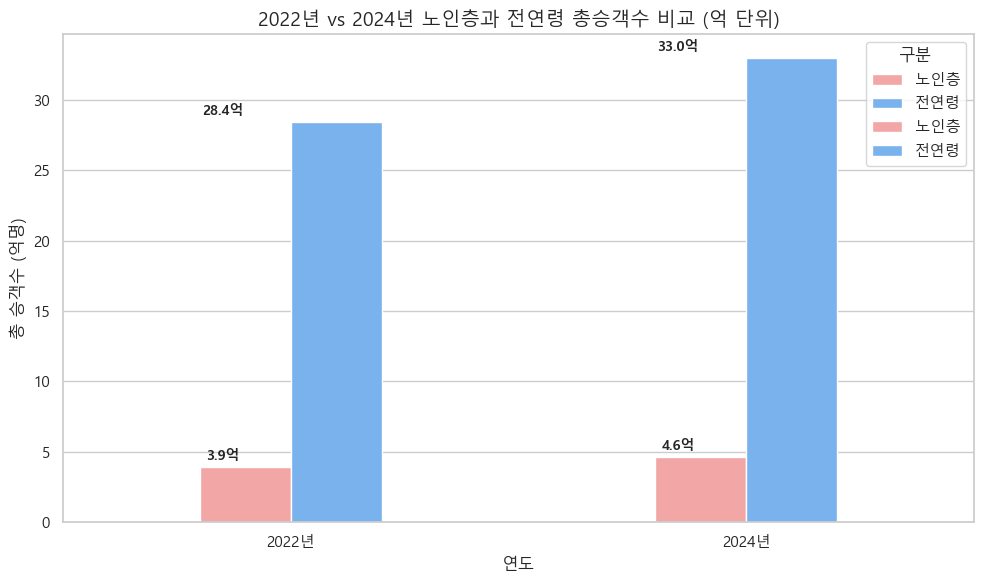

In [30]:

# 억 단위로 변환
growth_results['2022년 총 승객수_억'] = (growth_results['2022년 총 승객수'].astype(float) / 1e8).round(1)
growth_results['2024년 총 승객수_억'] = (growth_results['2024년 총 승객수'].astype(float) / 1e8).round(1)

plt.figure(figsize=(10,6))

# 막대폭 조절 (bar_width)
bar_width = 0.4

# 22년도 막대
sns.barplot(
    x=['2022년']*len(growth_results), 
    y=growth_results['2022년 총 승객수_억'], 
    hue=growth_results['구분'], 
    palette=['#FF9999','#66B2FF'], 
    dodge=True, 
    width=bar_width
)

# 24년도 막대
sns.barplot(
    x=['2024년']*len(growth_results), 
    y=growth_results['2024년 총 승객수_억'], 
    hue=growth_results['구분'], 
    palette=['#FF9999','#66B2FF'], 
    dodge=True, 
    width=bar_width
)

# 막대 위에 숫자 표시
for idx, row in growth_results.iterrows():
    plt.text(x=0 - 0.15, y=row['2022년 총 승객수_억'] + 0.5, s=f"{row['2022년 총 승객수_억']}억", ha='center', fontsize=10, fontweight='bold')
    plt.text(x=1 - 0.15, y=row['2024년 총 승객수_억'] + 0.5, s=f"{row['2024년 총 승객수_억']}억", ha='center', fontsize=10, fontweight='bold')

plt.title("2022년 vs 2024년 노인층과 전연령 총승객수 비교 (억 단위)", fontsize=14)
plt.ylabel("총 승객수 (억명)")
plt.xlabel("연도")
plt.xticks([0,1], ['2022년', '2024년'])
plt.legend(title='구분')
plt.tight_layout()
plt.show()
